# Global Life Expectancy Predictions Based on International Metrics
## Data Modeling, Testing, and Predictions


  
June 23, 2023 | Seamus Walsh and Daniel Gieseke


Life expectancies vary over countries globally.  With this project we are aiming to create a model that will predict a country's life expectancy at birth based on a variety of factors.  Not only is this project focused on building a strong predictive model, this project further aims to look into which country features prove to be the most important when considering life expectancy at birth.  This data was sourced from The World Bank and the United Nations via Kaggle.

This notebook explores the modeling, testing, and precictions from our data and models.

Data Source: https://www.kaggle.com/datasets/truecue/worldsustainabilitydataset?select=WorldSustainabilityDataset.csv

### Importing our Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/cleaned_international_data.csv')

### Creating our First Model - Logistic Regression
Below we are taking our first attempt at modeling our data.  We first split our data into a train-test split, then feed our data into a pipeline which standardizes our data then fits it to a logistic regression.  Finally, we explore the accuracy score of our model.

In [3]:
y = df['High_Life_Expectancy']
X = df[['GDP per capita (current US$) - NY.GDP.PCAP.CD',  'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
       'Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS', 
        'Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS', 
        'Urban population (% of total population) - SP.URB.TOTL.IN.ZS', 'Year',
       'Rural population (% of total population) - SP.RUR.TOTL.ZS', 'Africa', 'Asia', 'Europe', 'North America', 
        'South America', 'High income', 'Low income', 'Lower-middle income', 'Upper-middle income', 'Closed Autocracy', 
        'Electoral Autocracy', 'Electoral Democracy', 'Liberal Democracy', 'Eastern and South-Eastern Asia', 
        'Europe and Northern America', 'Latin America and Caribbean', 'Northern Africa and Western Asia', 
        'Sub-Saharan Africa']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [5]:
# Build a pipeline with StandardScaler and Logistic Regression
scaled_pipeline_1 = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(random_state = 42))])

In [6]:
# Fit the training data to pipeline
scaled_pipeline_1.fit(X_train, y_train)

# Print the accuracy on training and test sets
print("Accuracy Score of Training Data:", scaled_pipeline_1.score(X_train, y_train))
print("Accuracy Score of Test Data:", scaled_pipeline_1.score(X_test, y_test))

Accuracy Score of Training Data: 0.9286783042394015
Accuracy Score of Test Data: 0.9255813953488372


**Summary of Our First Model**

Above we see an accuracy score of 92.9% on our training data, and 92.5% on our test data.  These scores are both fairly high.  Additionally, since the accuracy score for the test data is not far off from our training data, we can say that our model did not 'overfit' to our training data.  While these scores are fairly high, we are going to create additional models to see if we can improve this score.

### Creating our Second Model - Random Forest Classifier
For our second model, we turn to a Random Forest Classifier in lieu of a logistic regression.  Below we create a pipeline with a standard scaler as well as a Random Forest Classifier and feed in our X and y values we split above.  Lastly, we explore the accuracy scores of the test and training sets.

In [7]:
# Build a pipeline with StandardScaler and RandomForestClassifier
scaled_pipeline_2 = Pipeline([('scaler', StandardScaler()), ('RF', RandomForestClassifier(random_state = 42))])

In [8]:
# Fit the training data to pipeline
scaled_pipeline_2.fit(X_train, y_train)

# Print the accuracy on test set
print("Accuracy Score of Training Data:", scaled_pipeline_2.score(X_train, y_train))
print("Accuracy Score of Test Data:", scaled_pipeline_2.score(X_test, y_test))

Accuracy Score of Training Data: 1.0
Accuracy Score of Test Data: 0.9813953488372092


**Summary of Our Second Model**

Above we see an accuracy score of 100% on our training data, and 98% on our test data.  These scores are both very high.  Additionally, since the accuracy score for the test data is not far off from our training data, we can say that our model did not 'overfit' to our training data.  We are opting to continue to tune our hyperparameters to see if we can improve the accuracy score on our test data.

### Creating and Tuning our Final Model with GridSearch
As mentioned above, we are continuing to tune our model we created above with GridSearch.  Below we create a grid with hyperparameters to tune to, then feed in our estimator defined above into a GridSearch.

In [9]:
# Define the grid
grid = [{'RF__max_depth': [2, 14, 15, 16, 17, 18], 
         'RF__min_samples_split': [2, 3], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [10]:
# Define a grid search
gridsearch = GridSearchCV(estimator = scaled_pipeline_2, param_grid = grid, scoring = 'accuracy', cv = 5)

In [11]:
# Fit the training data
gridsearch.fit(X_train, y_train)

# Printing the Best Parameters for our Model
best_params = gridsearch.best_params_
print(best_params)

{'RF__max_depth': 17, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2}


In [12]:
# Print the accuracy on training and test sets
print("Accuracy Score of Training Data:", gridsearch.score(X_train, y_train))
print("Accuracy Score of Test Data:", gridsearch.score(X_test, y_test))

Accuracy Score of Training Data: 1.0
Accuracy Score of Test Data: 0.9802325581395349


**Summary of Our Final Model**

Above we see an accuracy score of 100% on our training data, and 98% on our test data.  It looks as though our scores are not improving here, and we are happy with our scores so this model and the respective hyper parameters will remain.

### Visualizing a Confusion Matrix of our Final Model
Below we create a visualization of the test predictions from our final model showing the false positives and false negatives created.

In [13]:
# Creating Predictions
y_pred = scaled_pipeline_2.predict(X_test)

# Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

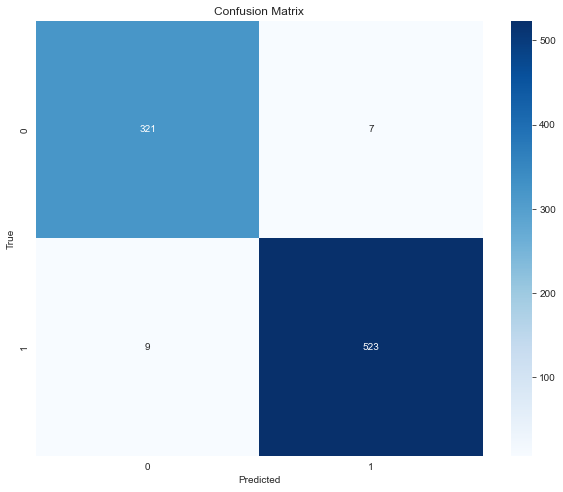

In [14]:
# Creating a Heatmap of the Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Exploring Feature Importance in Our Final Model
Below we are exploring and printing the features in our model as well as their respective importance in our model.  

In [15]:
# Finding Feature Importance from Our Model
importances = scaled_pipeline_2.named_steps['RF'].feature_importances_

# Creating List of Tuples with Feature Names and Importances
feature_importances = [(feature, importance) for feature, importance in zip(X.columns, importances)]
feature_importances

[('GDP per capita (current US$) - NY.GDP.PCAP.CD', 0.11660210674136592),
 ('Access to electricity (% of population) - EG.ELC.ACCS.ZS',
  0.1638138200048514),
 ('Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS',
  0.2889245107370798),
 ('Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS',
  0.044188450094087235),
 ('Urban population (% of total population) - SP.URB.TOTL.IN.ZS',
  0.05859537342060725),
 ('Year', 0.018131107283763076),
 ('Rural population (% of total population) - SP.RUR.TOTL.ZS',
  0.061150427537522825),
 ('Africa', 0.04293273111498146),
 ('Asia', 0.0051572955965218815),
 ('Europe', 0.010839874054971605),
 ('North America', 0.00712939039599187),
 ('South America', 0.0025225158961748964),
 ('High income', 0.01740983793243999),
 ('Low income', 0.022438653083451613),
 ('Lower-middle income', 0.011898879242769299),
 ('Upper-middle income', 0.003229209817980488),
 ('Closed Autocracy', 0.0023662076161421177),
 ('Electoral Autoc

**Summary of Feature Importance Analysis**

Above we see a few features which hold most importance in our model: 'GDP per Capita', 'Access to Electricity', 'Particulate Emission Damage', and 'Urban Population'.  Based off of this, we can say that we see a correlation with life expectancies above 70 years old, and  GPD per Capita, access to electricity, particulate emission damage, and urban population.